In [1]:
import requests
from time import sleep
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
team_a_id = '8291895' # Tundra
team_b_id = '2586976' # OG
# teams_ids = ['6209804', '8605863']

#### Overall Winrate

In [3]:
url = 'https://api.opendota.com/api/teams/{}'
response_a = requests.get(url=url.format(team_a_id))
sleep(1)
response_b = requests.get(url=url.format(team_b_id))

In [4]:
team_a = response_a.json()
team_b = response_b.json()

In [5]:
overall_winrate_a = team_a['wins'] / (team_a['wins'] + team_a['losses'])
overall_winrate_b = team_b['wins'] / (team_b['wins'] + team_b['losses'])

In [6]:
print('{}% - {}%'.format(round(overall_winrate_a * 100), round(overall_winrate_b * 100)))

60% - 60%


Text(0.5, 1.0, 'Winrate (%)')

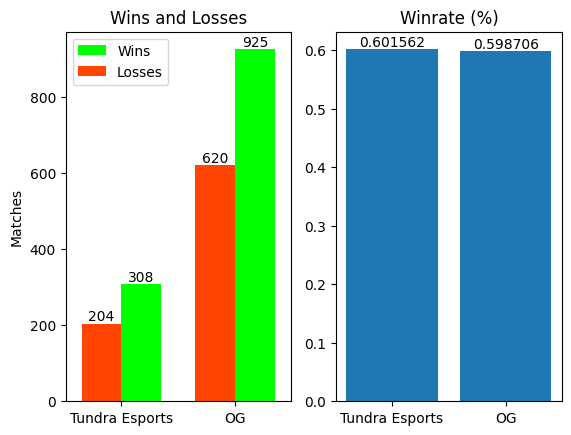

In [7]:
labels = [team_a['name'], team_b['name']]
width = 0.35
x = np.arange(len(labels))

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

rects1_1 = ax1.bar(x + width / 2, [team_a['wins'], team_b['wins']], width=width, label='Wins', color='lime')
rects1_2 = ax1.bar(x - width / 2, [team_a['losses'], team_b['losses']], width=width, label='Losses', color='orangered')
ax1.bar_label(rects1_1)
ax1.bar_label(rects1_2)
ax1.set_title('Wins and Losses')
ax1.set_ylabel('Matches')
ax1.legend()

rects2 = ax2.bar(labels, [overall_winrate_a, overall_winrate_b])
ax2.bar_label(rects2)
ax2.set_title('Winrate (%)')

#### Winrate Among Teams

In [8]:
url = 'https://api.opendota.com/api/teams/{}/matches'
response_a = requests.get(url=url.format(team_a_id))
sleep(1)
response_b = requests.get(url=url.format(team_b_id))

In [9]:
matches_team_a = response_a.json()
matches_team_b = response_b.json()

In [10]:
matches_between_teams = []
opposing_team_id = int(team_b_id)
team_a_score_among = 0
team_b_score_among = 0
for match in matches_team_a:
    if match['opposing_team_id'] == opposing_team_id:
        matches_between_teams.append(match)
        if match['radiant'] and match['radiant_win']:
            team_a_score_among += 1
        elif match['radiant'] and not match['radiant_win']:
            team_b_score_among += 1
        elif not match['radiant'] and match['radiant_win']:
            team_b_score_among += 1
        else:
            team_a_score_among += 1

In [11]:
winrate_among_a = team_a_score_among / (team_a_score_among + team_b_score_among)
winrate_among_b = team_b_score_among / (team_a_score_among + team_b_score_among)

In [12]:
print('{}% - {}%'.format(round(winrate_among_a * 100), round(winrate_among_b * 100)))

66% - 34%


Text(0.5, 1.0, 'Winrate (%)')

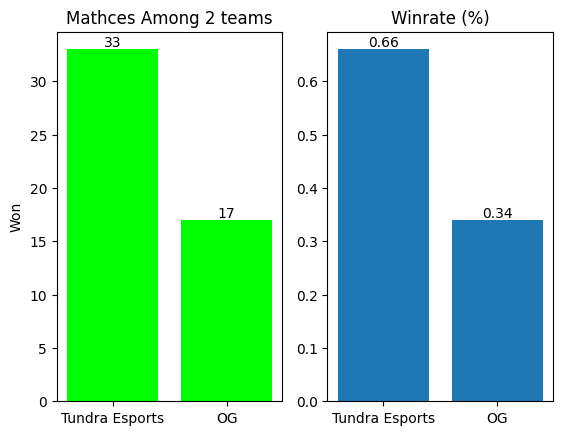

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

rects1 = ax1.bar(x, [team_a_score_among, team_b_score_among], color='lime')
ax1.bar_label(rects1)
ax1.set_title('Mathces Among 2 teams')
ax1.set_ylabel('Won')

rects2 = ax2.bar(labels, [winrate_among_a, winrate_among_b])
ax2.bar_label(rects2)
ax2.set_title('Winrate (%)')



#### Recent Matches Winrate

In [14]:
team_a_score_recent = 0
counter = 0
for match in matches_team_a:
    if counter == 100:
        break
    if match['radiant'] and match['radiant_win']:
        team_a_score_recent += 1
    elif not match['radiant'] and not match['radiant_win']:
        team_a_score_recent += 1
    counter += 1
print(team_a_score_recent, counter)

49 100


In [15]:
team_b_score_recent = 0
counter = 0
for match in matches_team_b:
    if counter == 100:
        break
    if match['radiant'] and match['radiant_win']:
        team_b_score_recent += 1
    elif not match['radiant'] and not match['radiant_win']:
        team_b_score_recent += 1
    counter += 1
print(team_b_score_recent, counter)

46 100


Text(0, 0.5, 'Won')

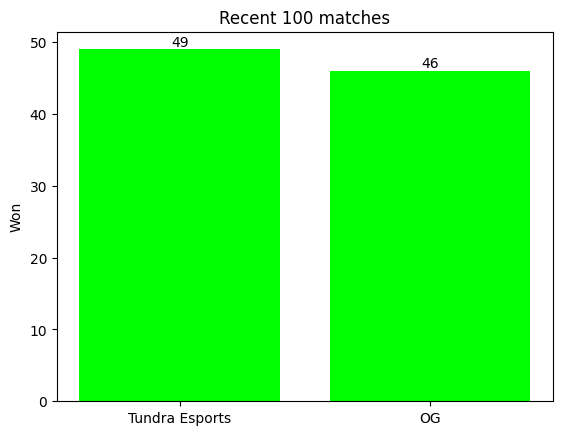

In [16]:
fig, (ax1) = plt.subplots(1, 1, sharex=True)

rects1 = ax1.bar(x, [team_a_score_recent, team_b_score_recent], color='lime')
ax1.bar_label(rects1)
ax1.set_xticks(x, labels)
ax1.set_title('Recent 100 matches')
ax1.set_ylabel('Won')

#### Team's Top Heroes

In [17]:
url = 'https://api.opendota.com/api/teams/{}/heroes'
response_a = requests.get(url=url.format(team_a_id))
sleep(1)
response_b = requests.get(url=url.format(team_b_id))

In [18]:
heroes_team_a = pd.DataFrame(response_a.json())
heroes_team_b = pd.DataFrame(response_b.json())

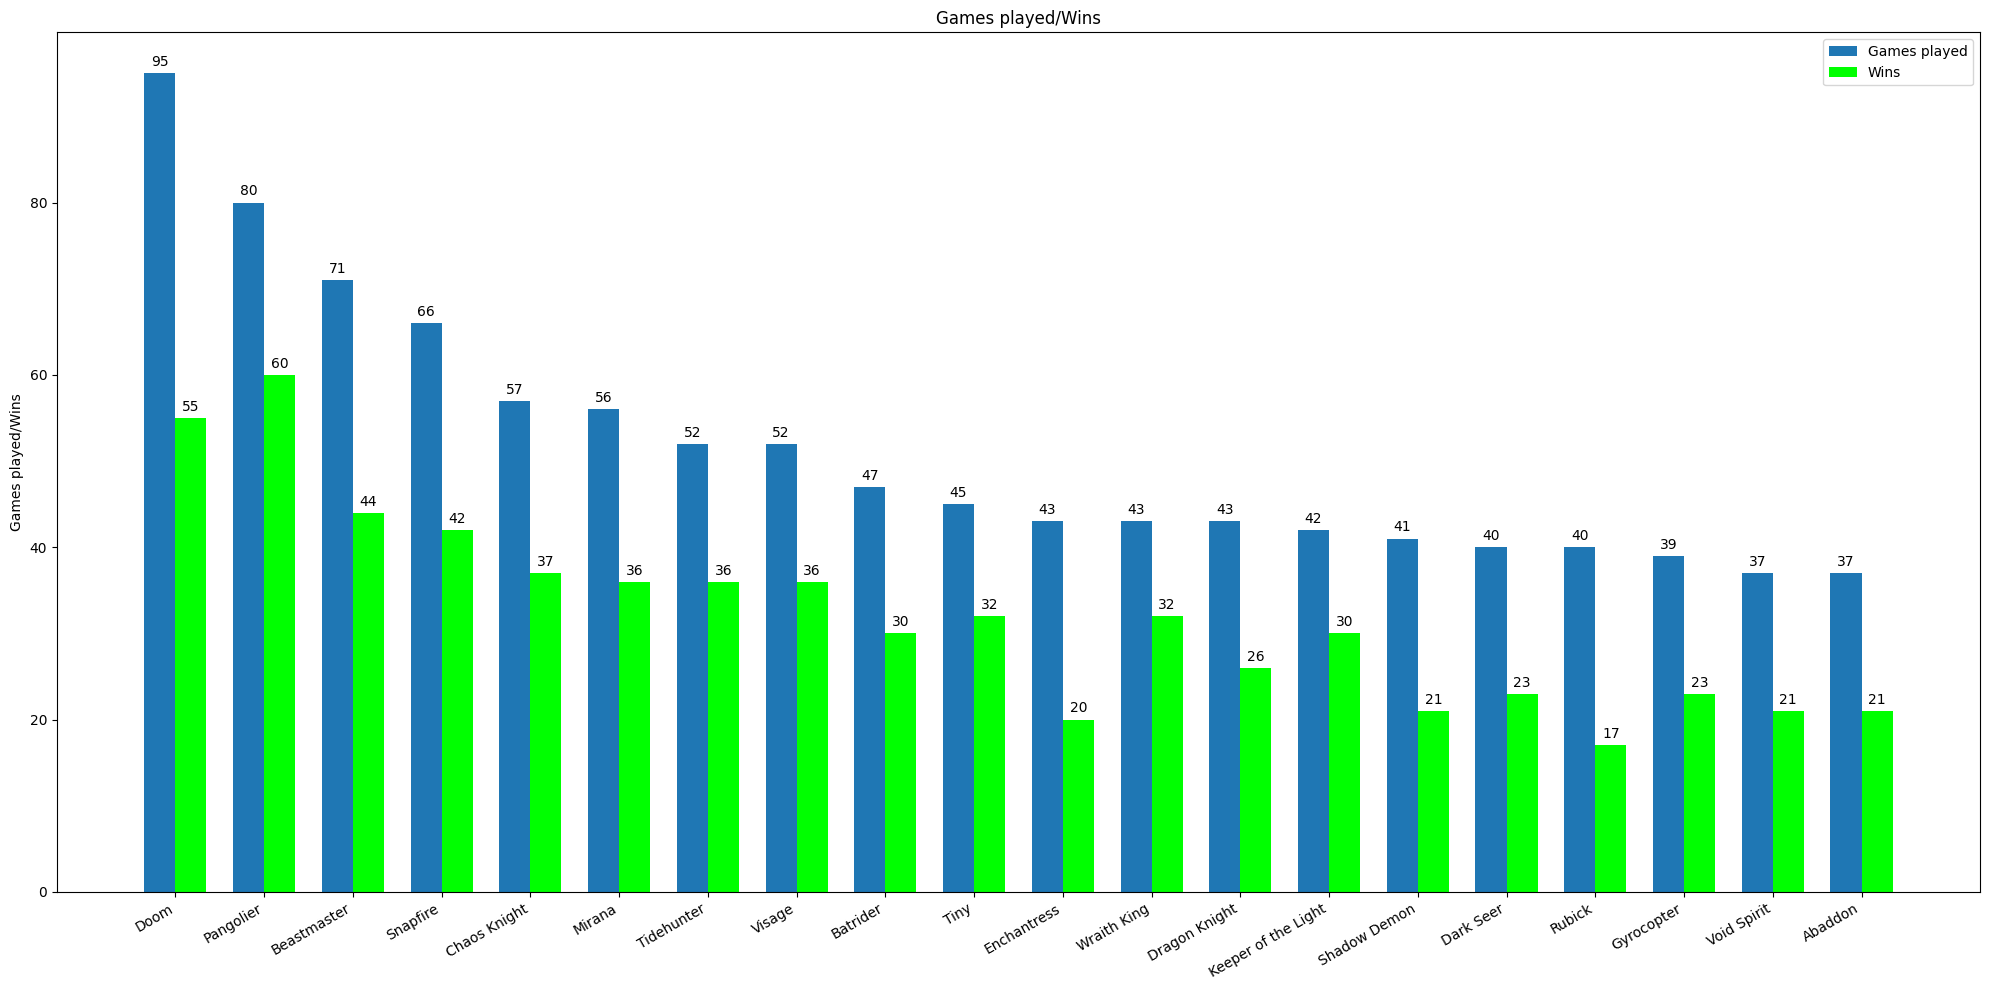

In [20]:
labels = heroes_team_a.values[:20, 1]
games_played = heroes_team_a.values[:20, 2]
wins = heroes_team_a.values[:20, 3]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x - width/2, games_played, width, label='Games played')
rects2 = ax.bar(x + width/2, wins, width, label='Wins', color='lime')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Games played/Wins')
ax.set_title('Games played/Wins')
ax.set_xticks(x, labels)

ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

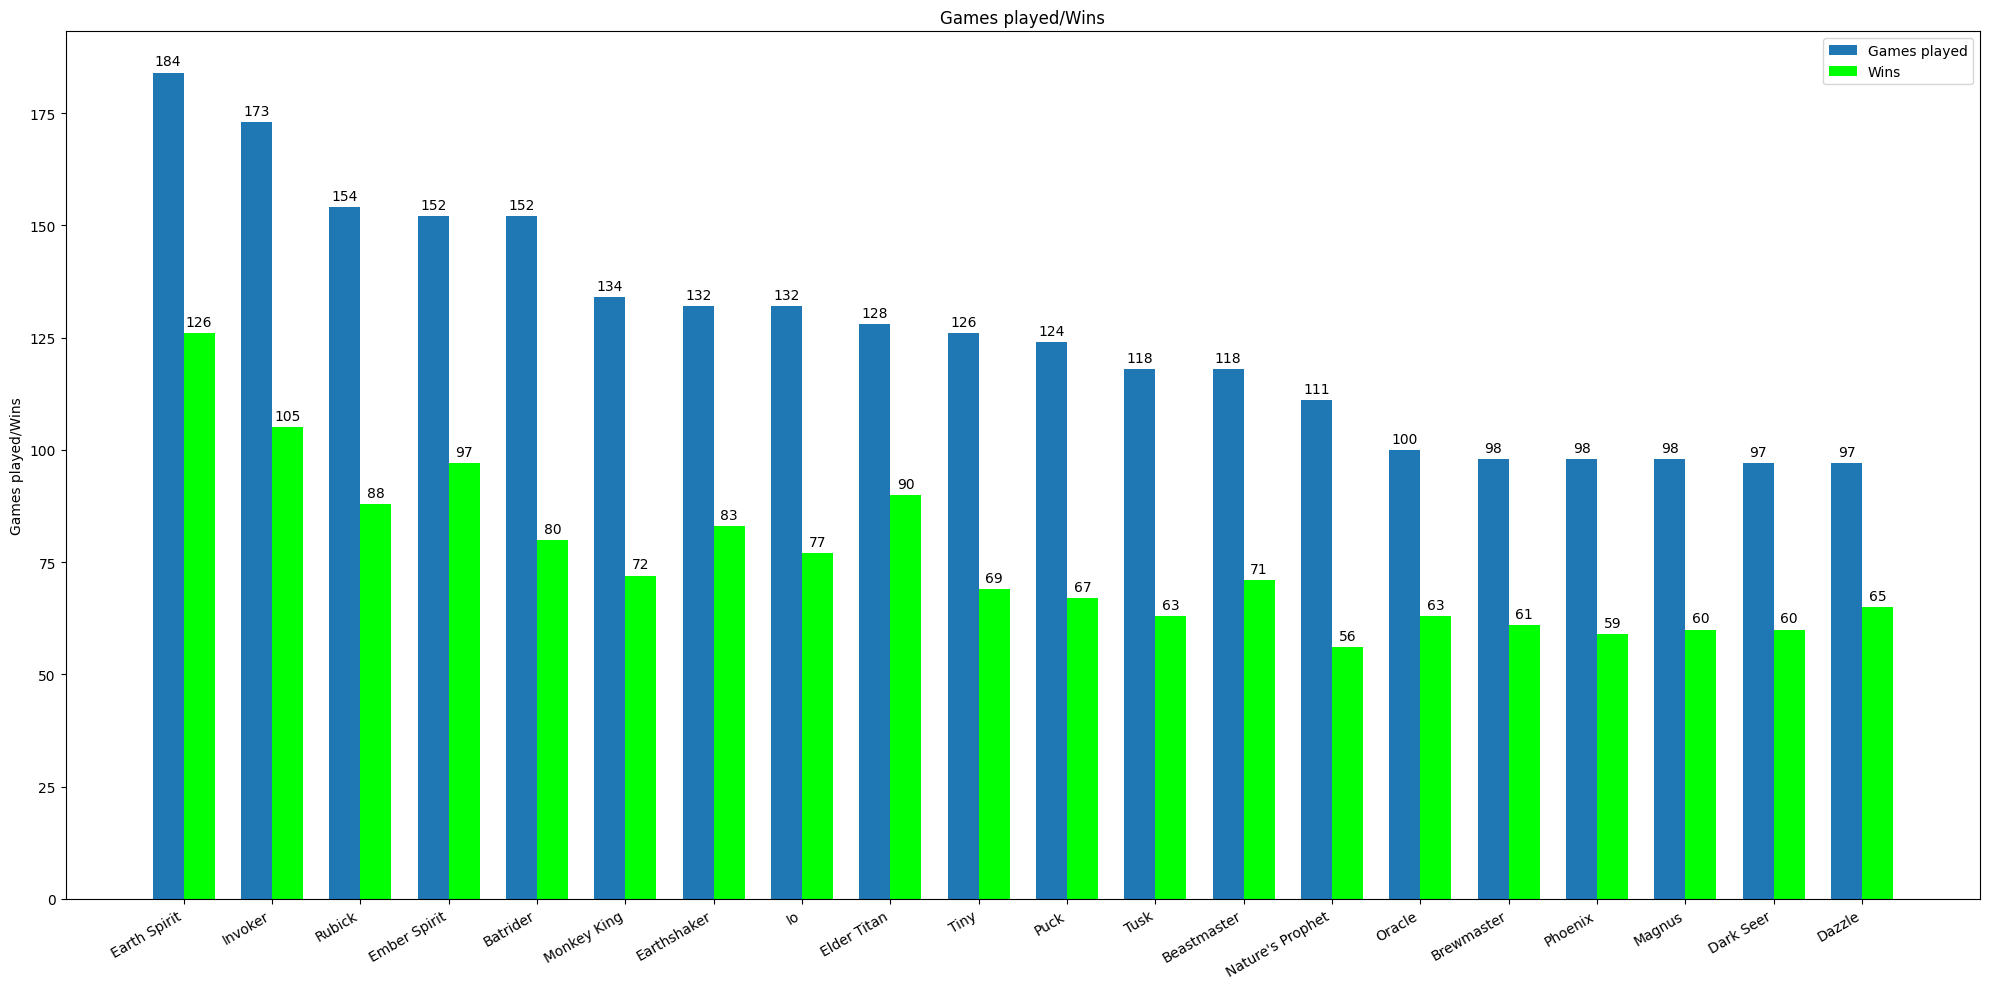

In [21]:
labels = heroes_team_b.values[:20, 1]
games_played = heroes_team_b.values[:20, 2]
wins = heroes_team_b.values[:20, 3]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x - width/2, games_played, width, label='Games played')
rects2 = ax.bar(x + width/2, wins, width, label='Wins', color='lime')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Games played/Wins')
ax.set_title('Games played/Wins')
ax.set_xticks(x, labels)

ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

#### Players

In [22]:
url = 'https://api.opendota.com/api/teams/{}/players'
response_a = requests.get(url=url.format(team_a_id))
sleep(1)
response_b = requests.get(url=url.format(team_b_id))

In [23]:
players_team_a = pd.DataFrame(response_a.json())
players_team_b = pd.DataFrame(response_b.json())

In [24]:
players_team_a

,account_id,name,games_played,wins,is_current_team_member
0,100058342,skiter,500,302,True
1,86698277,33,494,302,False
2,10366616,Sneyking,484,295,True
3,94786276,Nine,482,294,True
4,103735745,Saksa,271,174,True
5,86799300,Fata,129,78,False
6,40547474,Aui_2000,31,13,True
7,94054712,Topson,29,17,True
8,295697470,Immersion,28,13,True
9,92601861,Aramis,23,14,False


In [25]:
players_team_b

,account_id,name,games_played,wins,is_current_team_member
0,19672354,N0tail,1150,709,False
1,88271237,Ceb,694,394,True
2,26771994,JerAx,626,394,False
3,94155156,Fly,616,394,False
4,94054712,Topson,469,276,False
5,41231571,s4,396,251,False
6,93618577,bzm,389,212,True
7,167976729,yuragi,389,212,True
8,311360822,ana,350,217,False
9,401792574,Taiga,343,188,False
